In [5]:
import matplotlib
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
plt.rc('font', family='Lato')
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

sns.set_context('notebook', font_scale=2.5)

In [7]:
data_csv = '''
id,change_streamflow_mm,sign_change_streamflow,change_low_flow,sign_change_low_flow,change_peak_flow,sign_change_peak_flow,change_groundwater_recharge,change_groundwater_recharge,treatment_class,fraction_treated,site_name,catchment_name
1,-1.3,-1,NULL,NULL,0.00090745,1,NULL,NULL,Deforestation,1.0,"""Beaver Creek, Arizona, USA""","""BC1"""
2,50.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,1.0,"""Beaver Creek, Arizona, USA""","""BC12"""
3,20.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.5,"""Beaver Creek, Arizona, USA""","""BC14"""
4,37.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.65,"""Beaver Creek, Arizona, USA""","""BC16"""
5,53.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.77,"""Beaver Creek, Arizona, USA""","""BC17"""
6,11.0,1,NULL,NULL,0.000362981,1,NULL,NULL,Deforestation,0.83,"""Beaver Creek, Arizona, USA""","""BC3"""
7,10.0,1,NULL,NULL,0.000181491,1,NULL,NULL,Deforestation,1.0,"""Beaver Creek, Arizona, USA""","""BC6"""
8,51.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.33,"""Beaver Creek, Arizona, USA""","""BC8"""
9,25.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.32,"""Beaver Creek, Arizona, USA""","""BC9"""
10,60.0,1,5.0,1,0.96,1,NULL,NULL,Deforestation,0.5,"""Coyote Creek, Oregon, USA""","""CC-1"""
11,90.0,1,1.0,1,0.48,1,NULL,NULL,Deforestation,0.3,"""Coyote Creek, Oregon, USA""","""CC-2"""
12,290.0,1,11.0,1,1.5,1,NULL,NULL,Deforestation,1.0,"""Coyote Creek, Oregon, USA""","""CC-3"""
13,-14.0,-1,-3.4,-1,0.4,1,NULL,NULL,Deforestation,0.25,"""Fox Creek, Oregon, USA""","""FC-1"""
14,-6.0,-1,-1.2,-1,0.7,1,NULL,NULL,Deforestation,0.25,"""Fox Creek, Oregon, USA""","""FC-3"""
15,29.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.32,"""Workman Creek, Arizona, USA""","""WC-North Fork"""
16,-1.0,-1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.36,"""Workman Creek, Arizona, USA""","""WC-South Fork"""
17,102.0,1,NULL,NULL,NULL,NULL,NULL,NULL,Deforestation,0.52,"""Upper Bear Creek, Alabama, USA""","""XF1"""
18,297.0,1,NULL,NULL,0.00090745,1,NULL,NULL,Deforestation,0.82,"""Upper Bear Creek, Alabama, USA""","""XF2"""
'''

In [53]:
import io
data = pd.read_csv(io.StringIO(data_csv))
data.site_name = data.site_name.apply(lambda t: t.strip('"'))
data

,id,change_streamflow_mm,sign_change_streamflow,change_low_flow,sign_change_low_flow,change_peak_flow,sign_change_peak_flow,change_groundwater_recharge,change_groundwater_recharge.1,treatment_class,fraction_treated,site_name,catchment_name
0,1,-1.3,-1,NaN,NaN,0.000907,1.0,NaN,NaN,Deforestation,1.00,"Beaver Creek, Arizona, USA","""BC1"""
1,2,50.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,1.00,"Beaver Creek, Arizona, USA","""BC12"""
2,3,20.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,0.50,"Beaver Creek, Arizona, USA","""BC14"""
3,4,37.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,0.65,"Beaver Creek, Arizona, USA","""BC16"""
4,5,53.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,0.77,"Beaver Creek, Arizona, USA","""BC17"""
5,6,11.0,1,NaN,NaN,0.000363,1.0,NaN,NaN,Deforestation,0.83,"Beaver Creek, Arizona, USA","""BC3"""
6,7,10.0,1,NaN,NaN,0.000181,1.0,NaN,NaN,Deforestation,1.00,"Beaver Creek, Arizona, USA","""BC6"""
7,8,51.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,0.33,"Beaver Creek, Arizona, USA","""BC8"""
8,9,25.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Deforestation,0.32,"Beaver Creek, Arizona, USA","""BC9"""
9,10,60.0,1,5.0,1.0,0.960000,1.0,NaN,NaN,Deforestation,0.50,"Coyote Creek, Oregon, USA","""CC-1"""


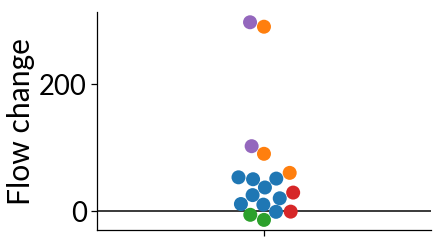

In [65]:
fig, ax = plt.subplots()

sns.despine(ax=ax)
sns.swarmplot(data=data,
              y='change_streamflow_mm',
              x='treatment_class',
              hue='site_name',
#               palette=sns.color_palette("ch:2.5,-.2,dark=.3"),
              size=14,
              ax=ax,
             )
plt.hlines(0, -1, 1)
ax.set_xlabel('')
ax.set_xticklabels([''])
ax.set_ylabel('Flow change')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.get_legend().remove()

fig.set_figwidth(6)

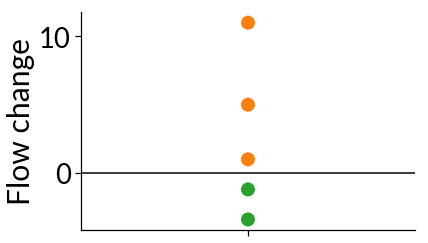

In [60]:
fig, ax = plt.subplots()

sns.despine(ax=ax)
sns.swarmplot(data=data,
              y='change_low_flow',
              x='treatment_class',
              hue='site_name',
#               palette=sns.color_palette("ch:2.5,-.2,dark=.3"),
              size=14,
              ax=ax,
             )
plt.hlines(0, -1, 1)
ax.set_xlabel('')
ax.set_xticklabels([''])
ax.set_ylabel('Flow change')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.get_legend().remove()

fig.set_figwidth(6)